# Used Cars

Analysis and exploration on Craigslist dataset. 
Download the dataset from https://www.kaggle.com/austinreese/craigslist-carstrucks-data.
Is it possible to predict the selling price of a specific used car?

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df1= pd.read_csv(r'vehicles.csv')
df1.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df1.isna().any()
df1.isnull().any() 

id              False
url             False
region          False
region_url      False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
VIN              True
drive            True
size             True
type             True
paint_color      True
image_url        True
description      True
county           True
state           False
lat              True
long             True
posting_date     True
dtype: bool

In [6]:
 df1.columns.tolist()

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [7]:
df1.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [33]:
df1.describe()


,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [4]:
df1.drop(df1[df1['price'] == 0].index, inplace=True)
df1.drop(df1[df1['year'].isna()].index, inplace=True)

In [4]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

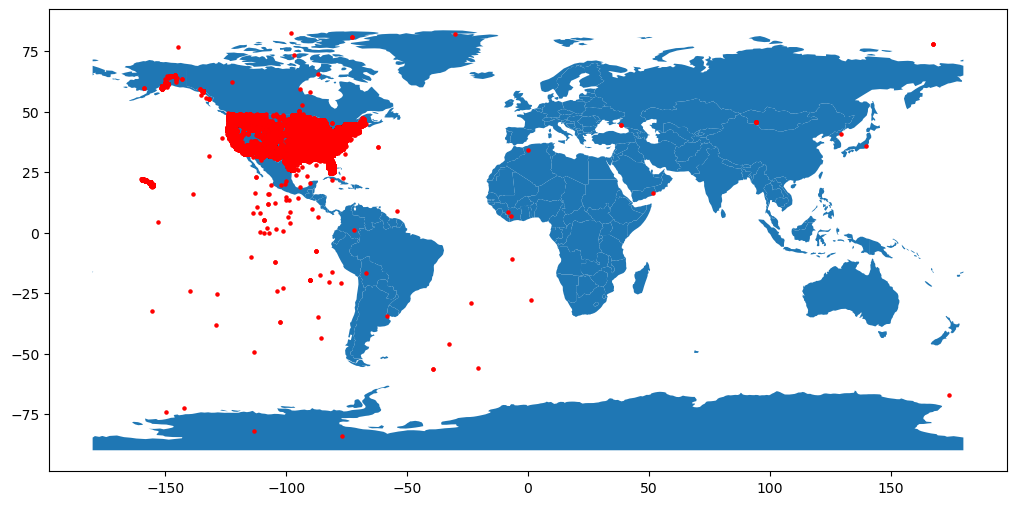

In [7]:

geometry = [Point(xy) for xy in zip(df1['long'], df1['lat'])]
gdf = GeoDataFrame(df1, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 6)), marker='o', color='red', markersize=5);

### Observation

In [9]:
##Count the number of unique values present in the 'fuel' column
fuelType_count = df1['fuel'].value_counts()
display(fuelType_count)

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

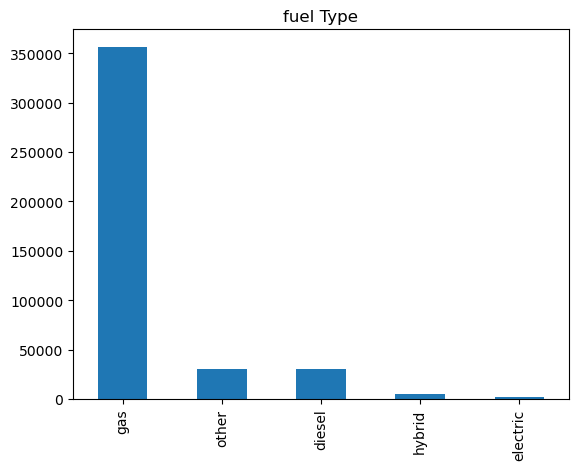

In [25]:
df1['fuel'].value_counts().plot(kind='bar',title='fuel Type')
plt.show()

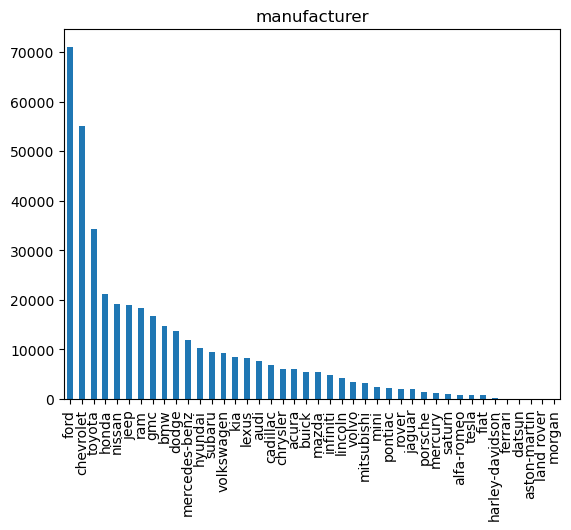

In [40]:
df1['manufacturer'].value_counts().plot(kind='bar',title='manufacturer')
plt.show()

In [18]:
correlations = df1.corr()
print(correlations)

                id     price      year  odometer  county       lat      long
id        1.000000 -0.002956 -0.063636  0.017063     NaN -0.069976 -0.120115
price    -0.002956  1.000000 -0.004879  0.010800     NaN  0.000347 -0.000539
year     -0.063636 -0.004879  1.000000 -0.163903     NaN -0.015008  0.007908
odometer  0.017063  0.010800 -0.163903  1.000000     NaN  0.001206  0.006475
county         NaN       NaN       NaN       NaN     NaN       NaN       NaN
lat      -0.069976  0.000347 -0.015008  0.001206     NaN  1.000000 -0.126840
long     -0.120115 -0.000539  0.007908  0.006475     NaN -0.126840  1.000000


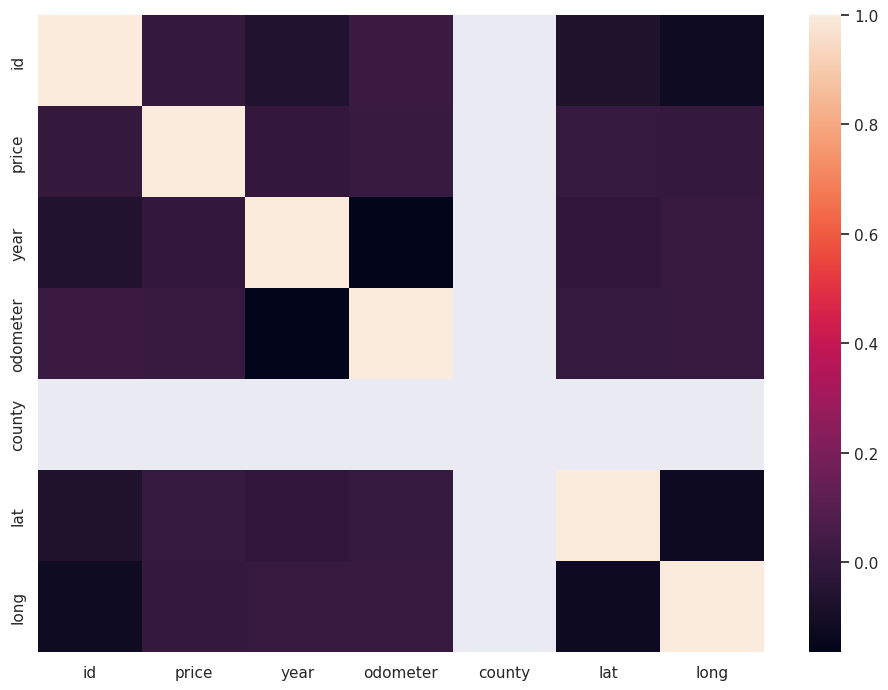

In [19]:
sns.heatmap(correlations)
plt.show()

In [23]:
 df1. model.unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [ ]:
df1["price"]

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(x="price", y="odometer", data= df1, height=7)

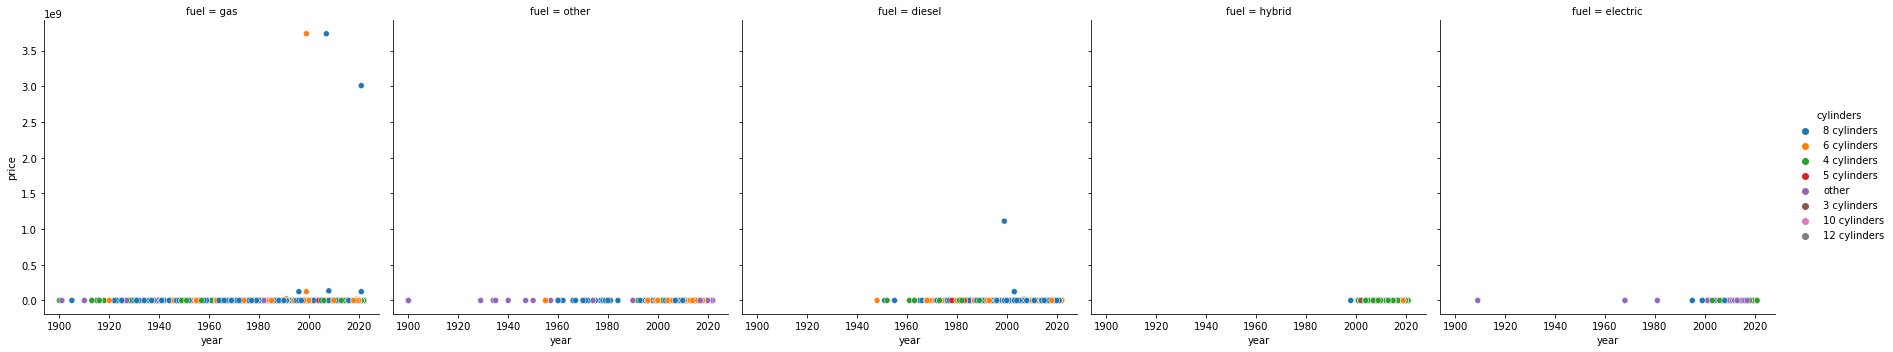

In [39]:
sns.relplot(
    x='year', 
    y='price', 
    data= df1,  
    kind='scatter', 
    col='fuel',
    hue='cylinders',);


In [25]:
df1.describe(include=[object])

,url,region,region_url,manufacturer,model,cylinders,fuel,title_status,transmission,VIN,drive,type,paint_color,image_url,description,state,posting_date
count,392812,392812,392812,377796,388173,232471,390477,385382,391051,240716,272840,307054,275801,392812,392810,392812,392812
unique,392812,404,413,42,28100,8,5,6,3,105246,3,13,12,224230,333104,51,351868
top,https://auburn.craigslist.org/ctd/d/auburn-uni...,columbus,https://nh.craigslist.org,ford,f-150,6,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3392,2942,64855,7116,88389,329670,372108,305744,261,120292,80128,72506,7357,231,45243,12


In [28]:
#############################################################
##Ordinal encoding or cylinders, condition, size and posting date
df1['cylinders'].replace(to_replace=['12 cylinders', '10 cylinders', '8 cylinders', '6 cylinders', '5 cylinders',
 '4 cylinders', '3 cylinders'], value=[12, 10, 8,6,5,4,3], inplace=True)

df1['condition'].replace(to_replace=['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], value=[5,4,3,2,1,0], inplace=True)

df1['size'].replace(to_replace=['full-size', 'mid-size', 'compact', 'sub-compact'], value=[3,2,1,0], inplace=True)



In [29]:
df1.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,2.0,8,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,2.0,8,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,2.0,8,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,2.0,8,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,3.0,6,...,3.0,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [10]:
df1.type.unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'convertible', 'wagon',
       'van'], dtype=object)

In [34]:
##filter out outliers of price and odometer

price_hi = df1['price'].quantile(0.999)
price_lo = df1['price'].quantile(0.001)

odom_hi = df1['odometer'].quantile(0.995)
odom_lo = df1['odometer'].quantile(0.001)
#Firstly ensure we are working with the dataset with removed outliers
cars_filtered = df1[(df1['price'] < price_hi) & (df1['price'] > price_lo) & (df1['odometer'] < odom_hi) & (df1['odometer'] > odom_lo)]
print(len(cars_filtered))

    



388231


### Plot distributions

Text(0, 0.5, 'Frequency')

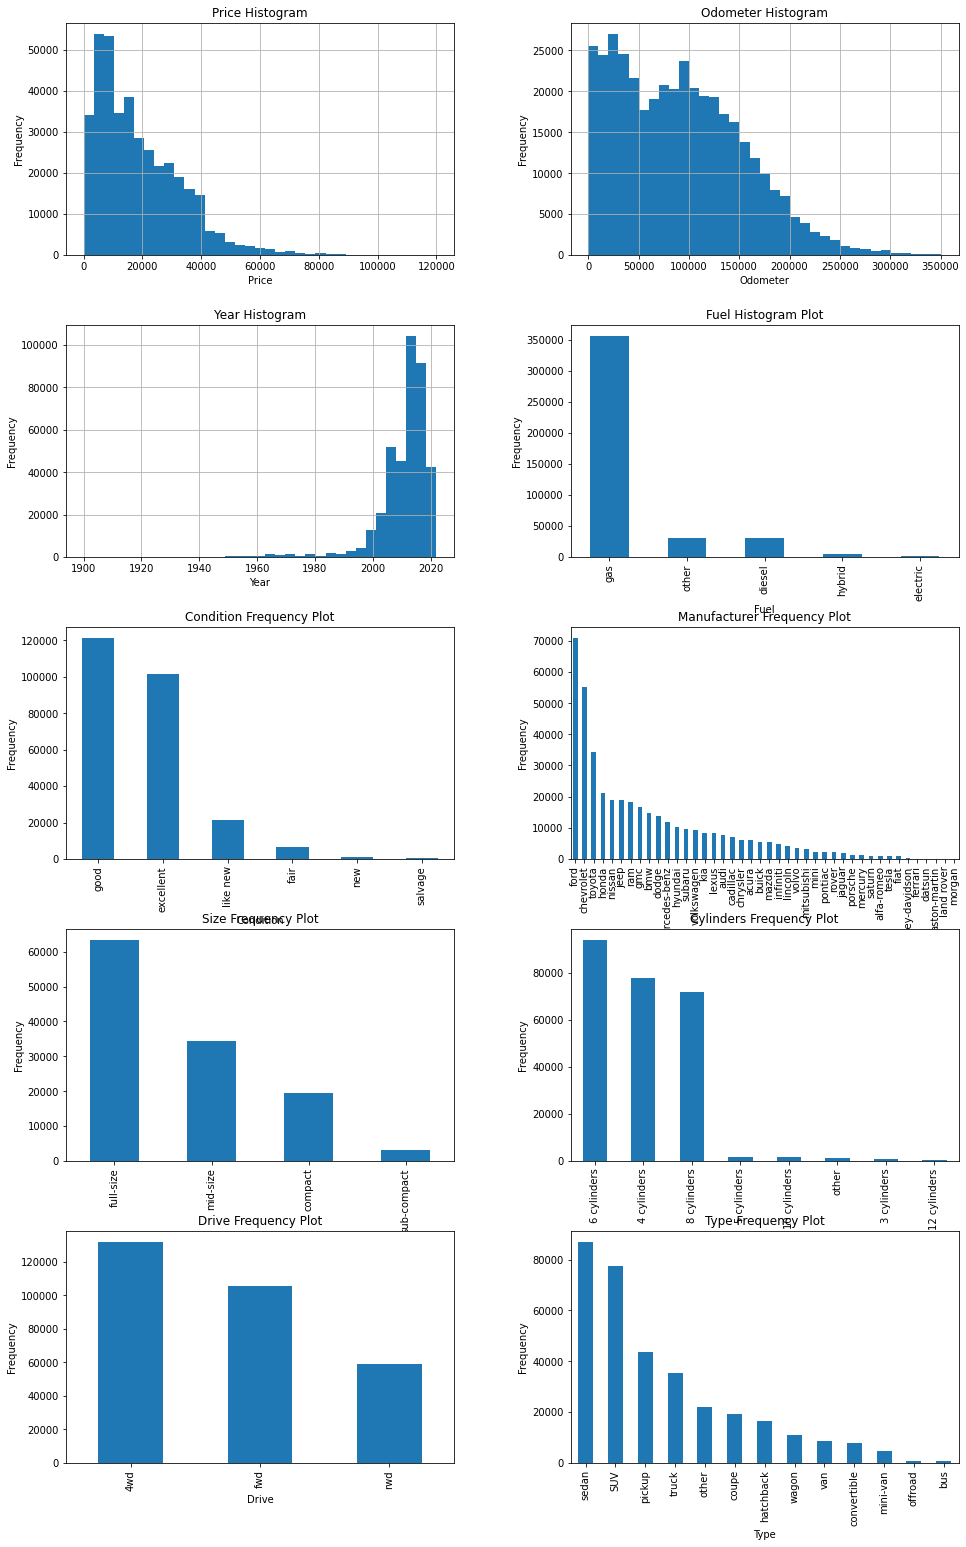

In [35]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,10))
fig.subplots_adjust(bottom = 5, top=7)

cars_filtered.hist(column='price', bins=35, ax=ax[0][0])
cars_filtered.hist(column='odometer', bins=35, ax=ax[0][1])

cars_filtered.hist(column='year', bins=35, ax=ax[1][0])
df1['fuel'].value_counts().plot(kind='bar', ax=ax[1][1])

df1['condition'].value_counts().plot(kind='bar', ax=ax[2][0])
df1['manufacturer'].value_counts().plot(kind='bar', ax=ax[2][1])

df1['size'].value_counts().plot(kind='bar', ax=ax[3][0])
df1['cylinders'].value_counts().plot(kind='bar', ax=ax[3][1])

df1['drive'].value_counts().plot(kind='bar', ax=ax[4][0])
df1['type'].value_counts().plot(kind='bar', ax=ax[4][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Year Histogram")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Fuel Histogram Plot")
ax[1][1].set_xlabel("Fuel")
ax[1][1].set_ylabel("Frequency")

ax[2][0].set_title("Condition Frequency Plot")
ax[2][0].set_xlabel("Condition")
ax[2][0].set_ylabel("Frequency")

ax[2][1].set_title("Manufacturer Frequency Plot")
ax[2][1].set_xlabel("Manufacturer")
ax[2][1].set_ylabel("Frequency")

ax[3][0].set_title("Size Frequency Plot")
ax[3][0].set_xlabel("Size")
ax[3][0].set_ylabel("Frequency")

ax[3][1].set_title("Cylinders Frequency Plot")
ax[3][1].set_xlabel("Cylinders")
ax[3][1].set_ylabel("Frequency")

ax[4][0].set_title("Drive Frequency Plot")
ax[4][0].set_xlabel("Drive")
ax[4][0].set_ylabel("Frequency")

ax[4][1].set_title("Type Frequency Plot")
ax[4][1].set_xlabel("Type")
ax[4][1].set_ylabel("Frequency")

### Visualise some correlations between attributes

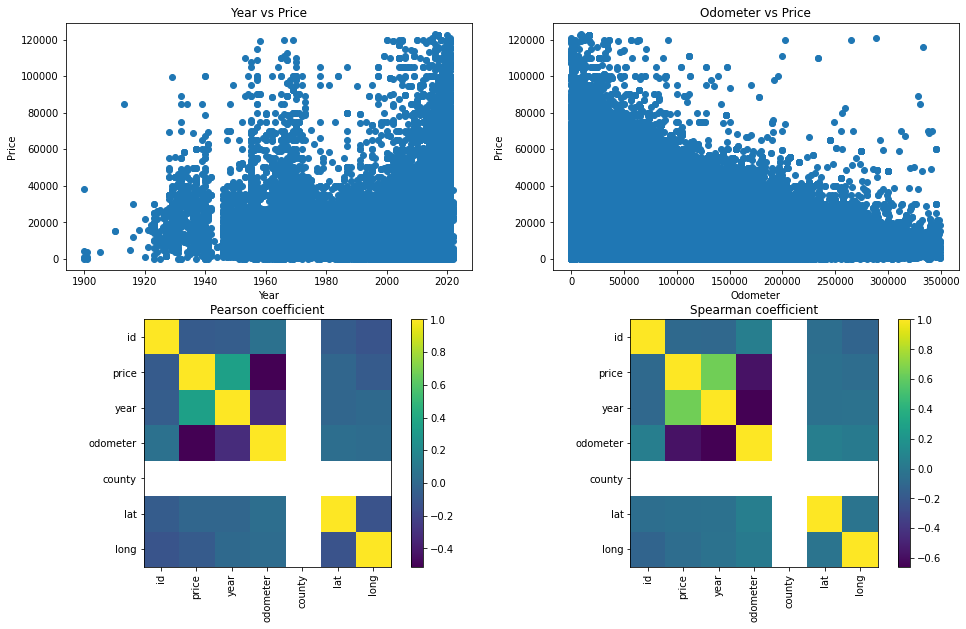

In [20]:


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

##Price vs year
cars_filtered.plot(x='year', y='price', style='o', ax=ax[0][0])
ax[0][0].set_xlabel("Year")
ax[0][0].set_ylabel("Price")
ax[0][0].get_legend().remove()
ax[0][0].set_title("Year vs Price")

##Price vs odometer
cars_filtered.plot(x='odometer', y='price', style='o', ax=ax[0][1])
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Price")
ax[0][1].get_legend().remove()
ax[0][1].set_title("Odometer vs Price")


pearsoncorr = cars_filtered.corr(method='pearson')
spearmancorr = cars_filtered.corr(method='spearman')

pimg = ax[1][0].imshow(pearsoncorr)
simg = ax[1][1].imshow(spearmancorr)

ax[1][0].set_title("Pearson coefficient")
ax[1][0].set_xticks(np.arange(len(pearsoncorr.columns.tolist())))
ax[1][0].set_yticks(np.arange(len(pearsoncorr.columns.tolist())))
ax[1][0].set_xticklabels(pearsoncorr.columns.tolist(), rotation=90)
ax[1][0].set_yticklabels(pearsoncorr.columns.tolist())

ax[1][1].set_title("Spearman coefficient")
ax[1][1].set_xticks(np.arange(len(spearmancorr.columns.tolist())))
ax[1][1].set_yticks(np.arange(len(spearmancorr.columns.tolist())))
ax[1][1].set_xticklabels(spearmancorr.columns.tolist(), rotation=90)
ax[1][1].set_yticklabels(spearmancorr.columns.tolist())

plt.colorbar(pimg, ax=ax[1][0])
plt.colorbar(simg, ax=ax[1][1])

In [30]:
print(len(cars_filtered))
print(len(cars_filtered.columns))

385249
17


Rows :  388231
Features : 16


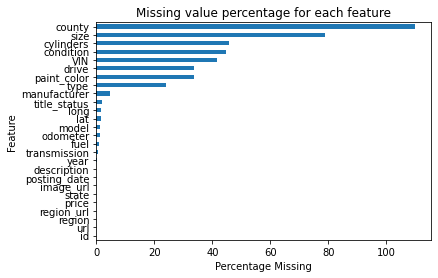

In [38]:
def displayStats(df):
    print("Rows : ", len(df))
    print("Features :", len(df.columns))
    
    missing = df1.isnull().sum()/len(df)*100
    missing = missing.sort_values()
    ax = missing.plot.barh(x='Percentage Missing', y='Feature')

    ax.set_title("Missing value percentage for each feature")
    ax.set_xlabel("Percentage Missing")
    ax.set_ylabel("Feature")
    
displayStats(cars_filtered)

### Conclusion

The general trend behind car pricing is pretty intuitive: the older the car — the lower the price. I’ve expected the age of the car to be number one feature in overall feature hierarchy.
Also, the older the car, the higher its odometer value in general, and that is reasonable.